## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [2]:
customer_set = pd.read_csv("./Mall_Customers.csv")
customer_set = customer_set.rename(index=str, columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "SpendingScore"})

**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [3]:
print("-"*40 + "\n")

print("Атрибути вибірки:")
display(customer_set.head(0))

print("-"*40 + "\n")

print(f"Розмірність датасету: {customer_set.shape}")

print("\n" + "-"*40 + "\n")

print("Статистична інформація:")
display(customer_set.describe())

print("-"*40 + "\n")

print("Типи даних:\n")
display(customer_set.info())

print("-"*40 + "\n")

print("Перевірка на наявність пропусків:")
display(customer_set.isnull().sum())

print("-"*40)


----------------------------------------

Атрибути вибірки:


,CustomerID,Gender,Age,Income,SpendingScore


----------------------------------------

Розмірність датасету: (200, 5)

----------------------------------------

Статистична інформація:


,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


----------------------------------------

Типи даних:

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


None

----------------------------------------

Перевірка на наявність пропусків:


CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

----------------------------------------


## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [4]:
customer_set = customer_set.drop("CustomerID", axis="columns")

**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

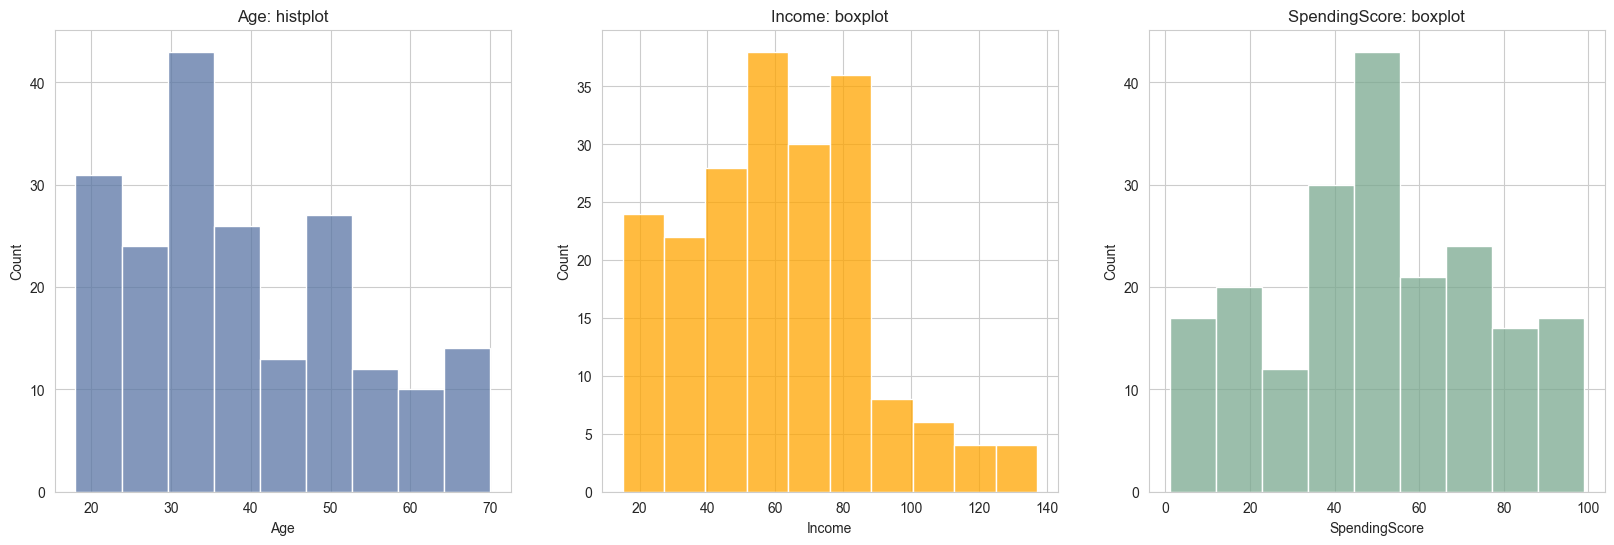

In [5]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(data=customer_set, x="Age", ax=ax1, color="#5975A4")
ax1.set_title("Age: histplot")

sns.histplot(data=customer_set, x="Income", ax=ax2, color="orange")
ax2.set_title("Income: boxplot")

sns.histplot(data=customer_set, x="SpendingScore", ax=ax3, color="#7AA88F")
ax3.set_title("SpendingScore: boxplot")

plt.show()

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

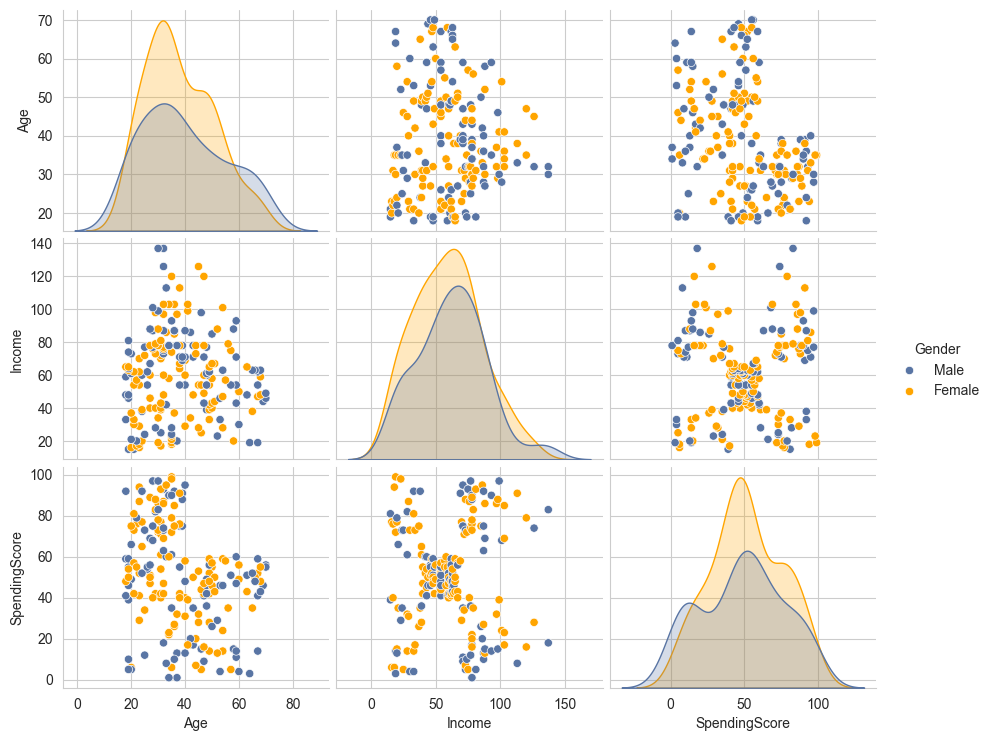

In [6]:
customer_pairplot = sns.pairplot(customer_set, hue="Gender", palette=["#5975A4", "orange"], aspect=1.2)
plt.show()

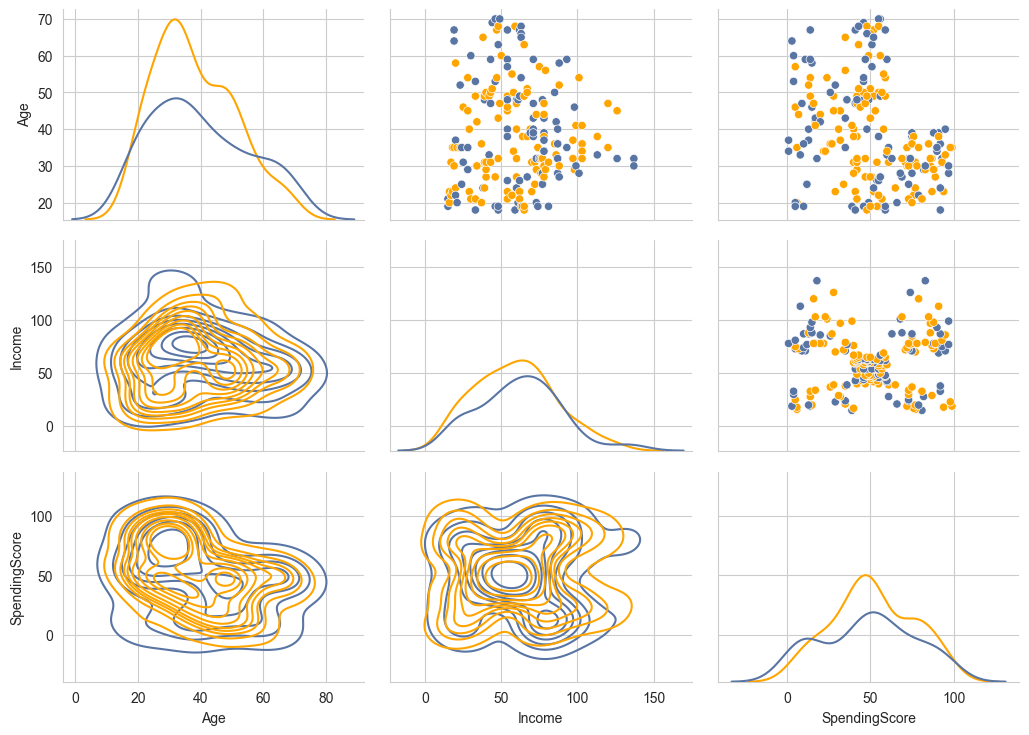

In [7]:
customer_pairgrid = sns.PairGrid(customer_set, hue="Gender", palette=["#5975A4", "orange"], aspect=1.4)
customer_pairgrid.map_upper(sns.scatterplot)
customer_pairgrid.map_diag(sns.kdeplot)
customer_pairgrid.map_lower(sns.kdeplot, lw=1)

plt.show()

**Висновки з 1-4 завдання (детальні)**

1.   
2.   
3. ...

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

----------------------------------------


Gender
Female    56.0
Male      44.0
Name: count, dtype: float64

----------------------------------------

Співвідношення жінок до чоловіків:
1.272727272727273

----------------------------------------


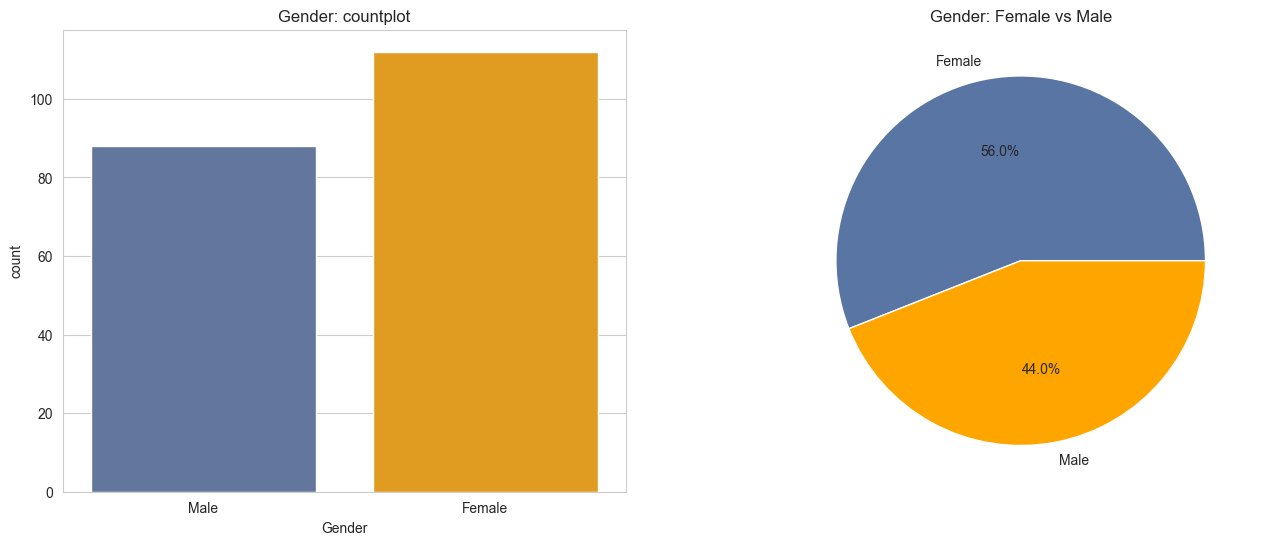

In [8]:
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(16, 6))

gender_stats = (customer_set["Gender"].value_counts() / customer_set["Gender"].value_counts().sum()) * 100
gender_ratio = gender_stats["Female"] / gender_stats["Male"]

print('-'*40)

display(gender_stats)

print('-'*40 + '\n')

print("Співвідношення жінок до чоловіків:")
print(gender_ratio)

print('\n' + '-'*40)

sns.countplot(customer_set, x="Gender", palette=['#5975A4', 'orange'], ax=ax1)
ax1.set_title("Gender: countplot")

ax2.pie(gender_stats, labels=["Female", "Male"], autopct='%1.1f%%', colors=['#5975A4', 'orange'])
ax2.set_title("Gender: Female vs Male")

plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

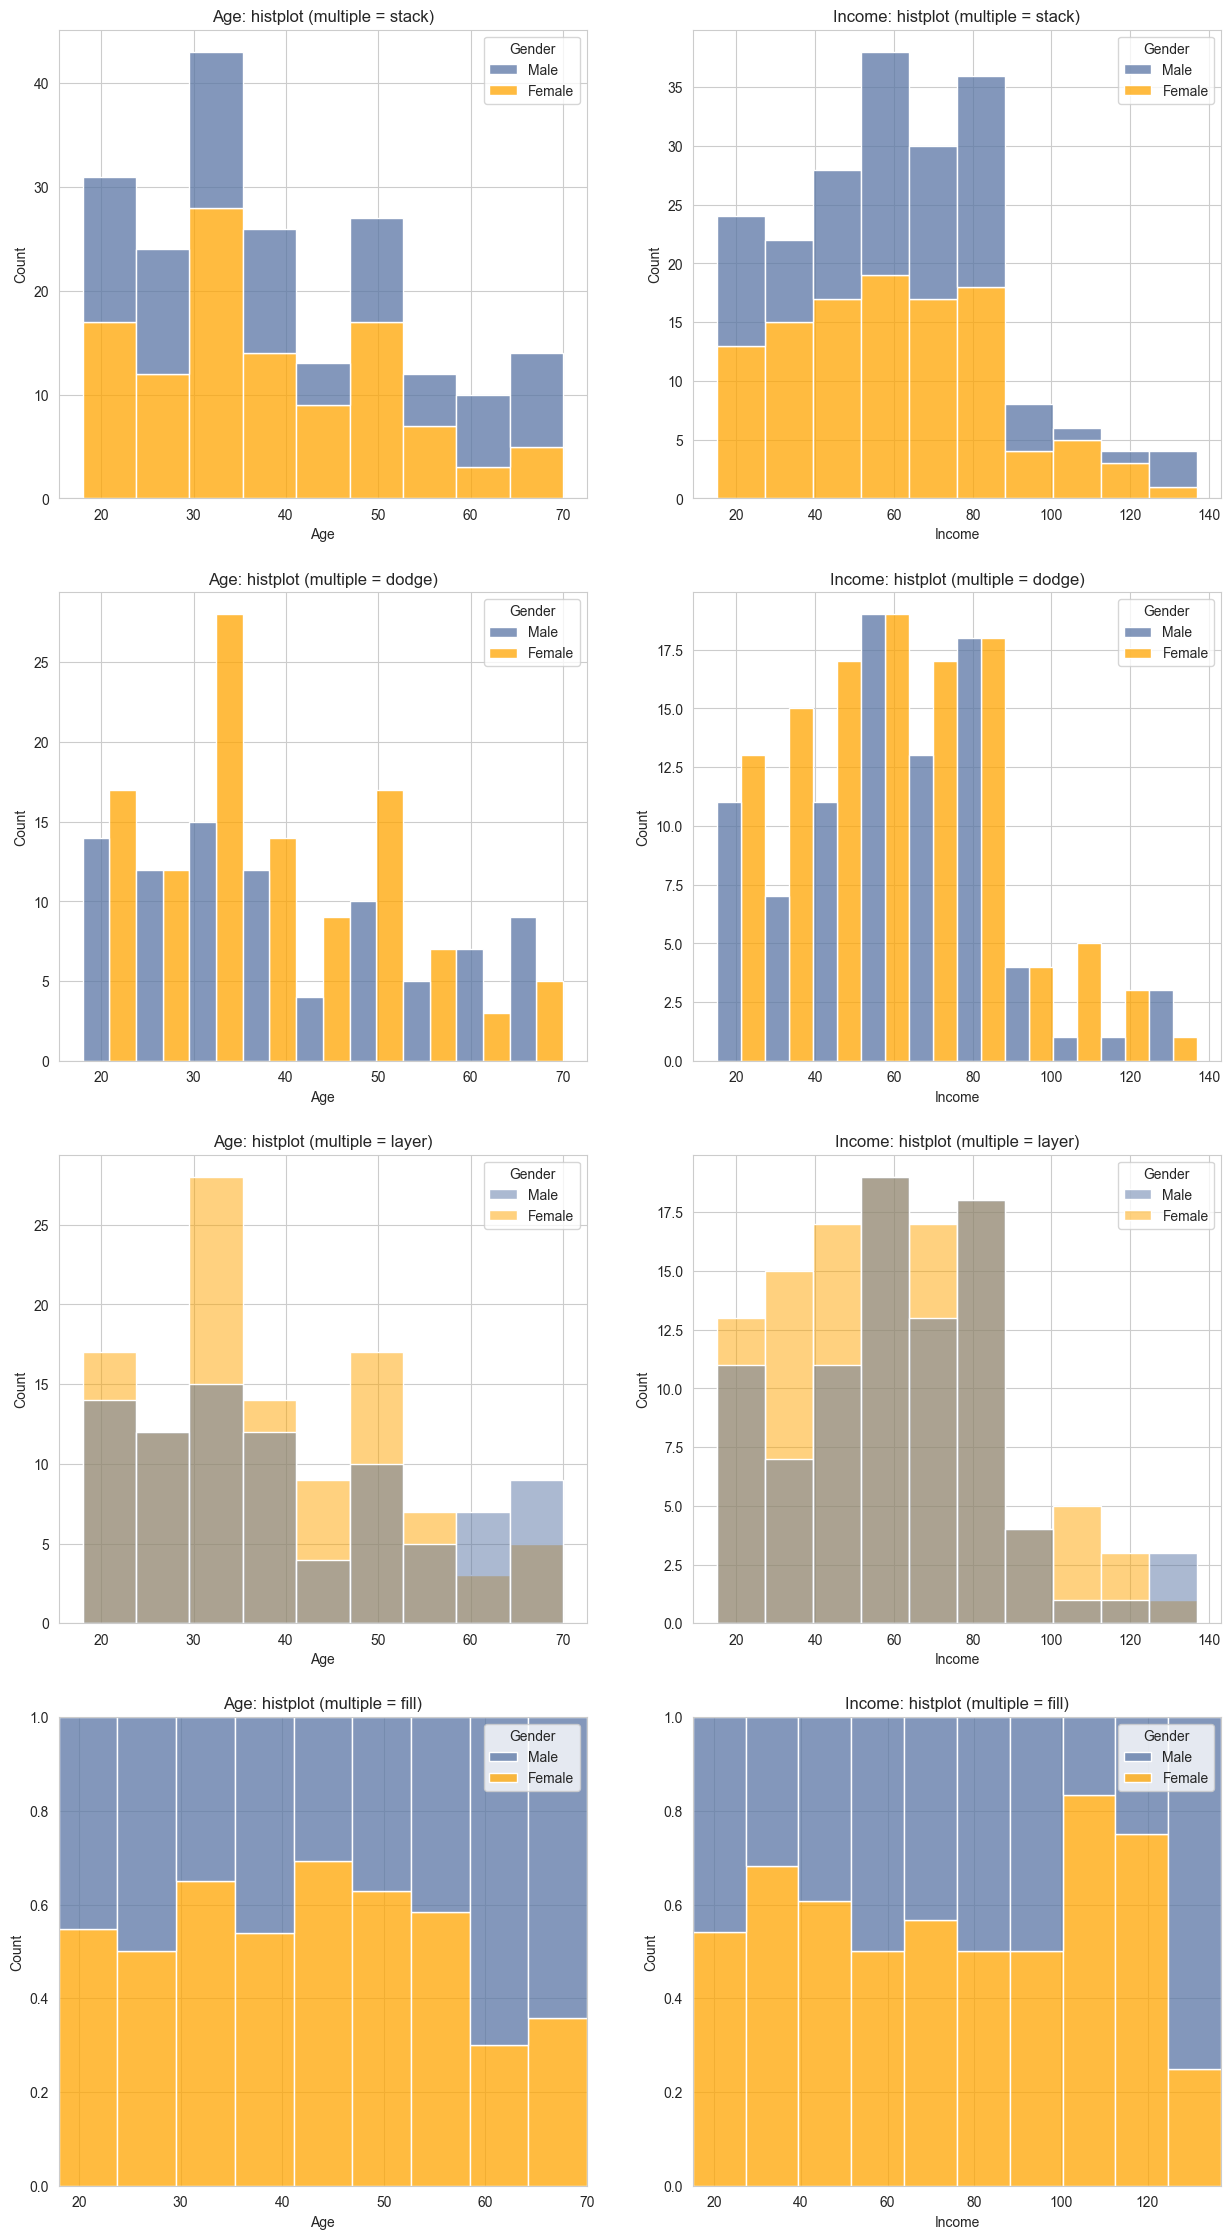

In [9]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(15, 28))

sns.histplot(data=customer_set, x="Age", hue="Gender", ax=ax1, palette=['#5975A4', 'orange'], multiple="stack")
ax1.set_title("Age: histplot (multiple = stack)")

sns.histplot(data=customer_set, x="Income", hue="Gender", ax=ax2, palette=['#5975A4', 'orange'], multiple="stack")
ax2.set_title("Income: histplot (multiple = stack)")

sns.histplot(data=customer_set, x="Age", hue="Gender", ax=ax3, palette=['#5975A4', 'orange'], multiple="dodge")
ax3.set_title("Age: histplot (multiple = dodge)")

sns.histplot(data=customer_set, x="Income", hue="Gender", ax=ax4, palette=['#5975A4', 'orange'], multiple="dodge")
ax4.set_title("Income: histplot (multiple = dodge)")

sns.histplot(data=customer_set, x="Age", hue="Gender", ax=ax5, palette=['#5975A4', 'orange'], multiple="layer")
ax5.set_title("Age: histplot (multiple = layer)")

sns.histplot(data=customer_set, x="Income", hue="Gender", ax=ax6, palette=['#5975A4', 'orange'], multiple="layer")
ax6.set_title("Income: histplot (multiple = layer)")

sns.histplot(data=customer_set, x="Age", hue="Gender", ax=ax7, palette=['#5975A4', 'orange'], multiple="fill")
ax7.set_title("Age: histplot (multiple = fill)")

sns.histplot(data=customer_set, x="Income", hue="Gender", ax=ax8, palette=['#5975A4', 'orange'], multiple="fill")
ax8.set_title("Income: histplot (multiple = fill)")

plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



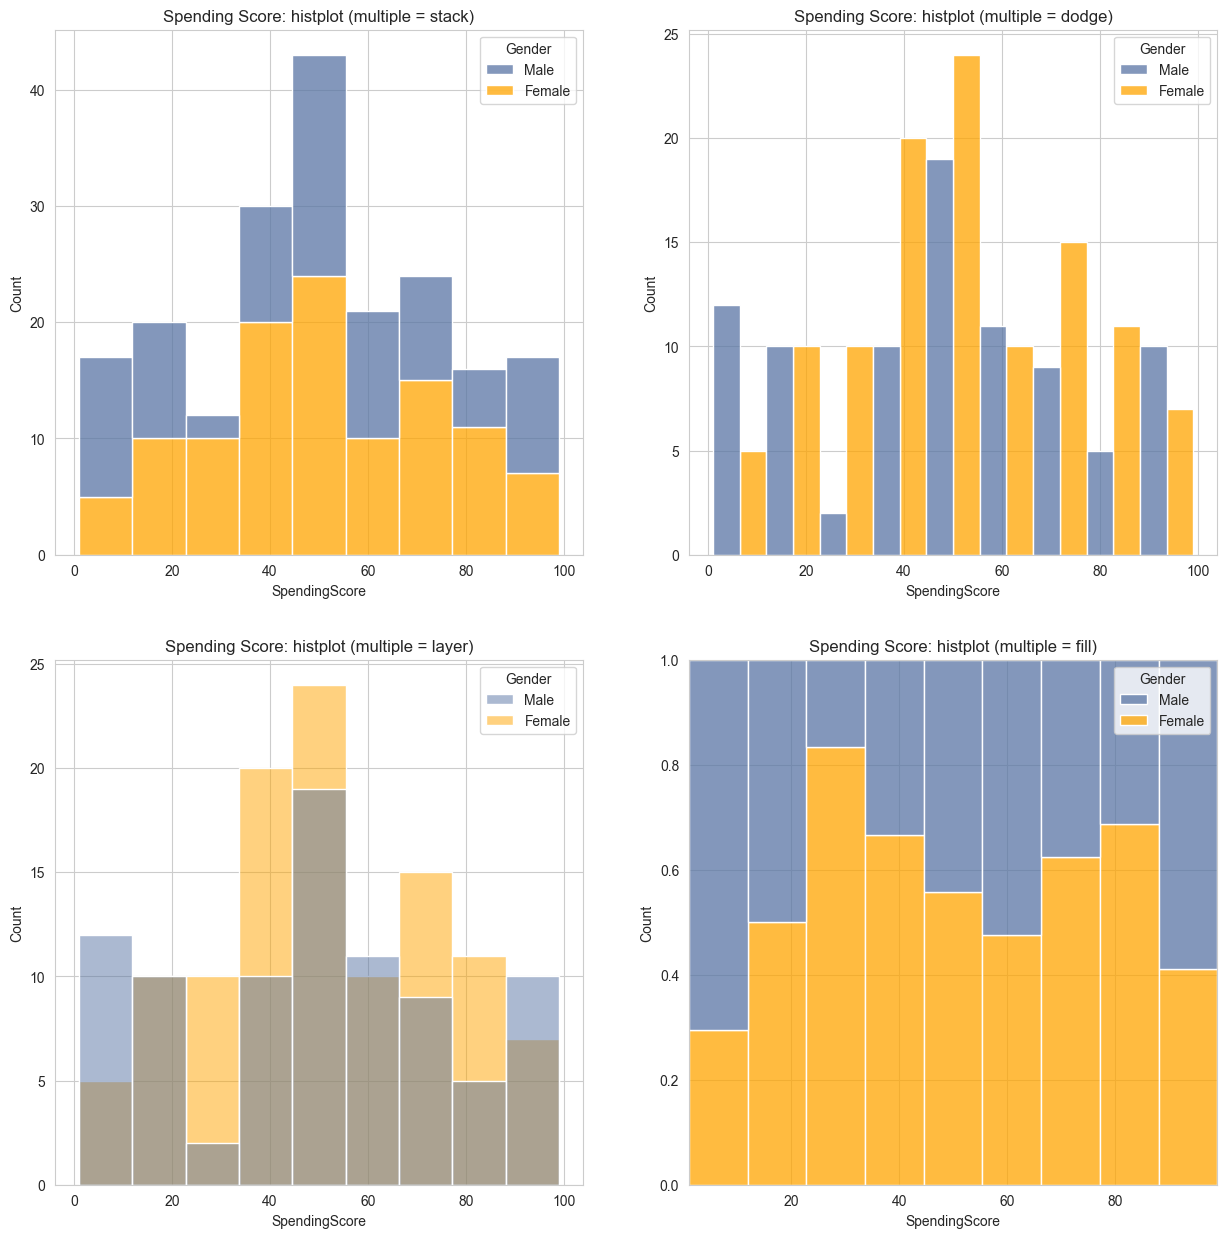

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", ax=ax1, palette=['#5975A4', 'orange'], multiple="stack")
ax1.set_title("Spending Score: histplot (multiple = stack)")

sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", ax=ax2, palette=['#5975A4', 'orange'], multiple="dodge")
ax2.set_title("Spending Score: histplot (multiple = dodge)")

sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", ax=ax3, palette=['#5975A4', 'orange'], multiple="layer")
ax3.set_title("Spending Score: histplot (multiple = layer)")

sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", ax=ax4, palette=['#5975A4', 'orange'], multiple="fill")
ax4.set_title("Spending Score: histplot (multiple = fill)")

plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

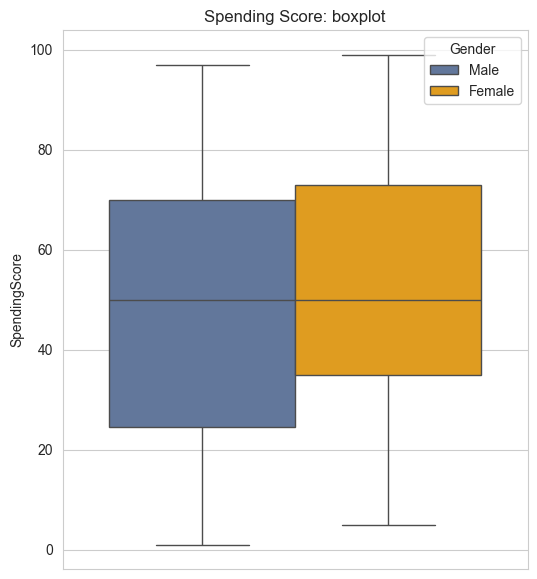

In [11]:
fig, ax1 = plt.subplots(figsize=(6, 7))

sns.boxplot(data=customer_set, y="SpendingScore", ax=ax1, palette=['#5975A4', 'orange'], hue="Gender")
ax1.set_title("Spending Score: boxplot")

plt.show()

**Висновки з завдання 5 - 8(детальні)**

1.   Яке співвідношення груп чоловіків та жінок?
2.  Подивитись які можна виділити групи і як розподілені витрати відностно статі людини? 
3. Чи є різниця між витратами у чоловіків та жінок?
4. ...

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

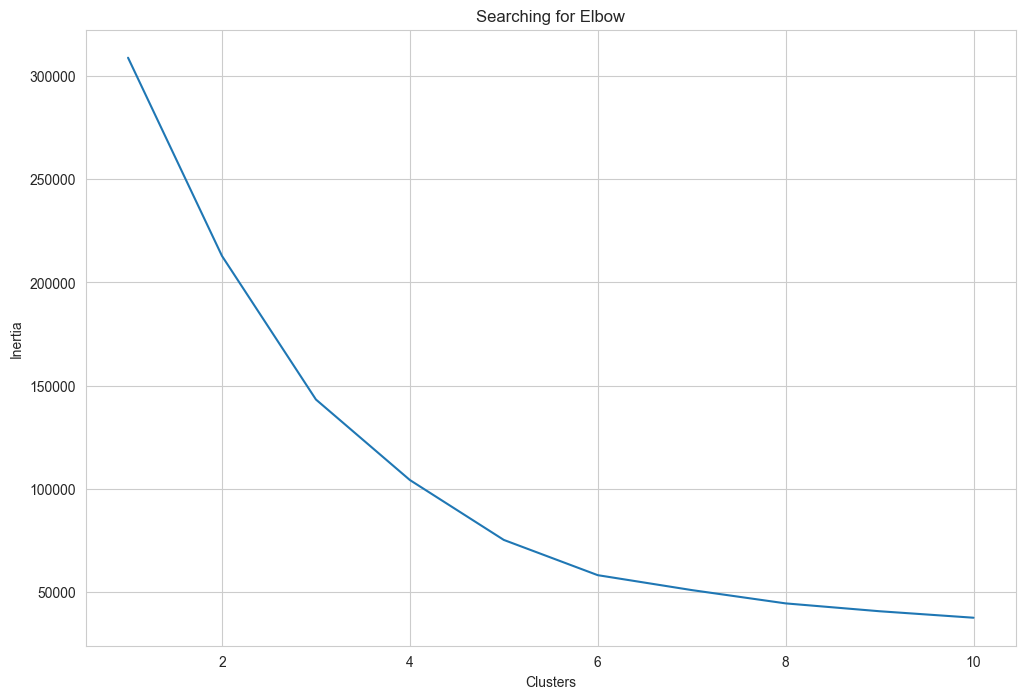

In [12]:
X = customer_set.drop(['Gender'], axis=1)
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

**Висновки з завдання 9 (детальні)** 

1.  Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів)
2.   
3. ...

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

In [13]:
km_3 = KMeans(n_clusters=3).fit(X)
cluster_3_labels = km_3.labels_

X['Labels_3'] = cluster_3_labels

In [14]:
km_5 = KMeans(n_clusters=5).fit(X)
cluster_5_labels = km_5.labels_

X['Labels_5'] = cluster_5_labels

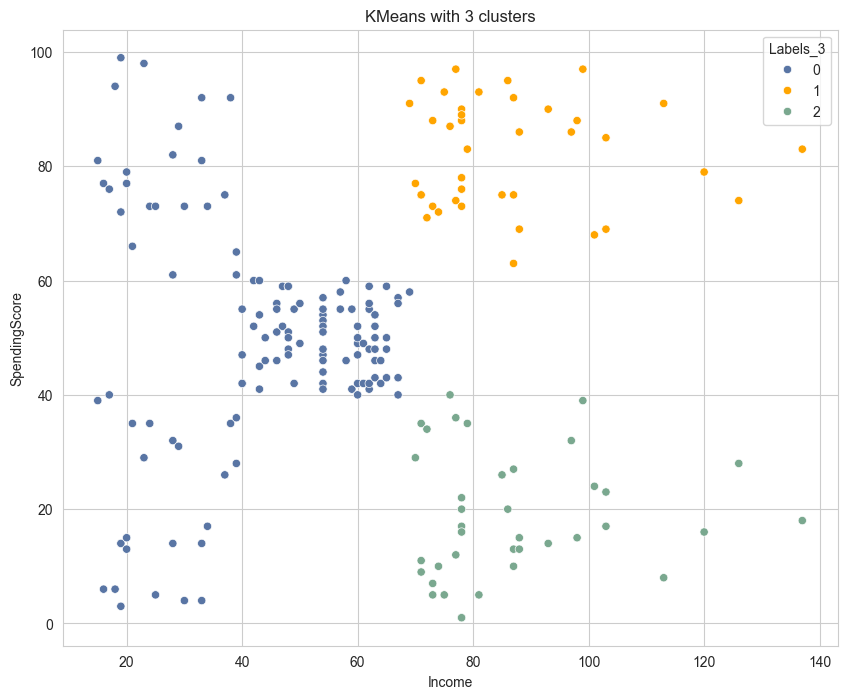

In [15]:
fig = plt.figure(figsize=(10, 8))

sns.scatterplot(data=X, x = 'Income', y = 'SpendingScore', hue=X['Labels_3'], palette=['#5975A4', 'orange', '#7AA88F'])
plt.title("KMeans with 3 clusters")
plt.show()

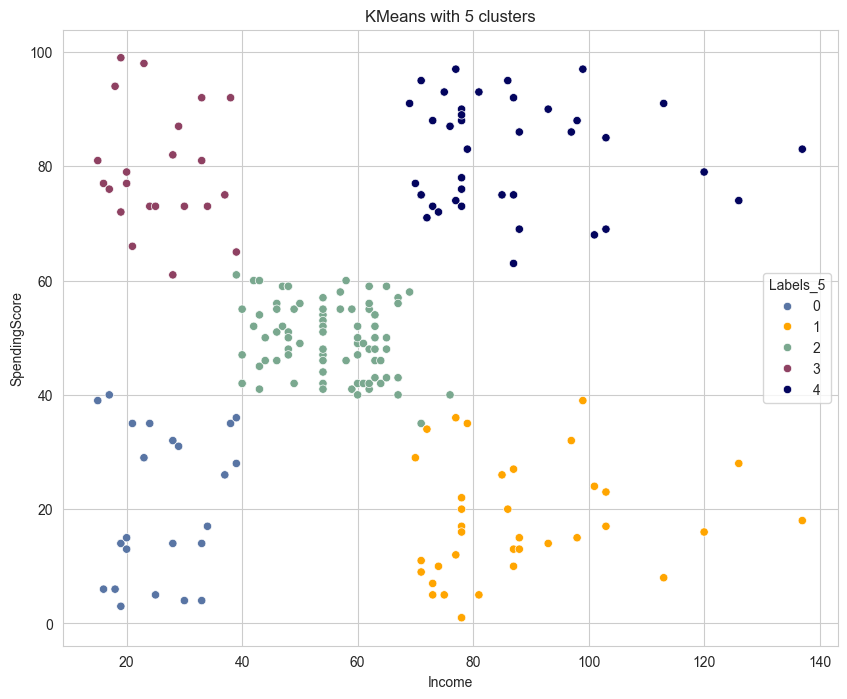

In [16]:
fig = plt.figure(figsize=(10, 8))

sns.scatterplot(data=X, x = 'Income', y = 'SpendingScore', hue=X['Labels_5'], palette=['#5975A4', 'orange', '#7AA88F', '#8E4162', '#03045E'])
plt.title("KMeans with 5 clusters")
plt.show()

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [17]:
fig = px.scatter_3d(X, x='Age', y='Income', z='SpendingScore', color=X['Labels_3'], color_continuous_scale=['#5975A4', 'orange', '#7AA88F'])
fig.show()

In [29]:
fig = px.scatter_3d(X, x='Age', y='Income', z='SpendingScore', color=X['Labels_5'], color_continuous_scale=['#5975A4', 'orange', '#7AA88F', '#8E4162', '#03045E'])
fig.show()

**Висновки з завдання 10 - 11 (детальні)** 

1. Визначитась з отриманих візуалізацій яка кількість кластерів є оптимальною на Вашу думку і провести аналіз кластерів, що Ви отримали.
2.   
3. ...

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


In [18]:
d_matrix = distance_matrix(X, X)
print(d_matrix)

[[  0.          42.15447782  33.03028913 ... 117.1836166  124.49497982
  130.22288585]
 [ 42.15447782   0.          75.07329752 ... 111.77208954 137.77517919
  122.35603786]
 [ 33.03028913  75.07329752   0.         ... 129.94229489 122.20474623
  143.82976048]
 ...
 [117.1836166  111.77208954 129.94229489 ...   0.          57.15767665
   14.35270009]
 [124.49497982 137.77517919 122.20474623 ...  57.15767665   0.
   65.10760324]
 [130.22288585 122.35603786 143.82976048 ...  14.35270009  65.10760324
    0.        ]]


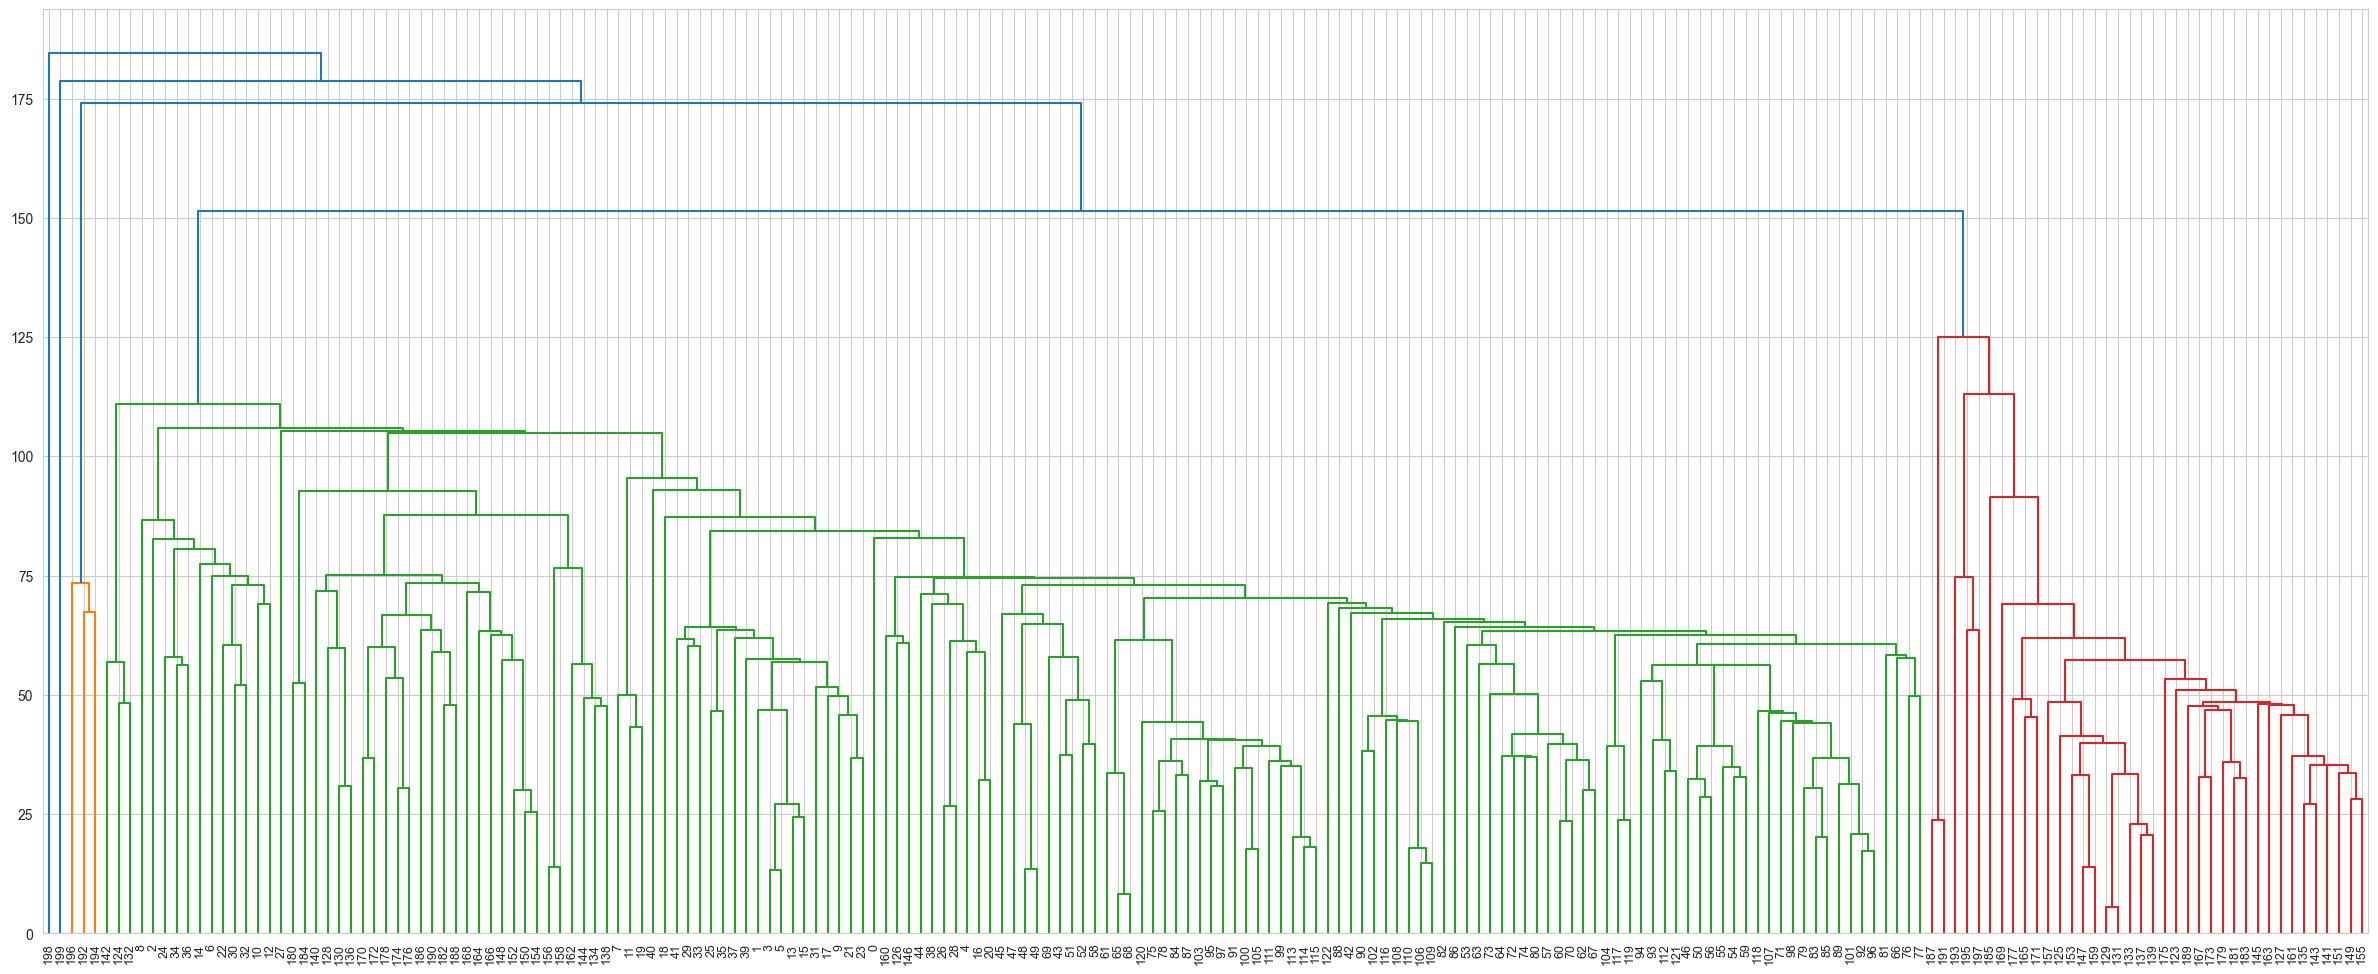

In [56]:
Z = hierarchy.linkage(d_matrix, method='single')

fig = plt.figure(figsize=(30, 12))
dendro = hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=9, orientation='top')

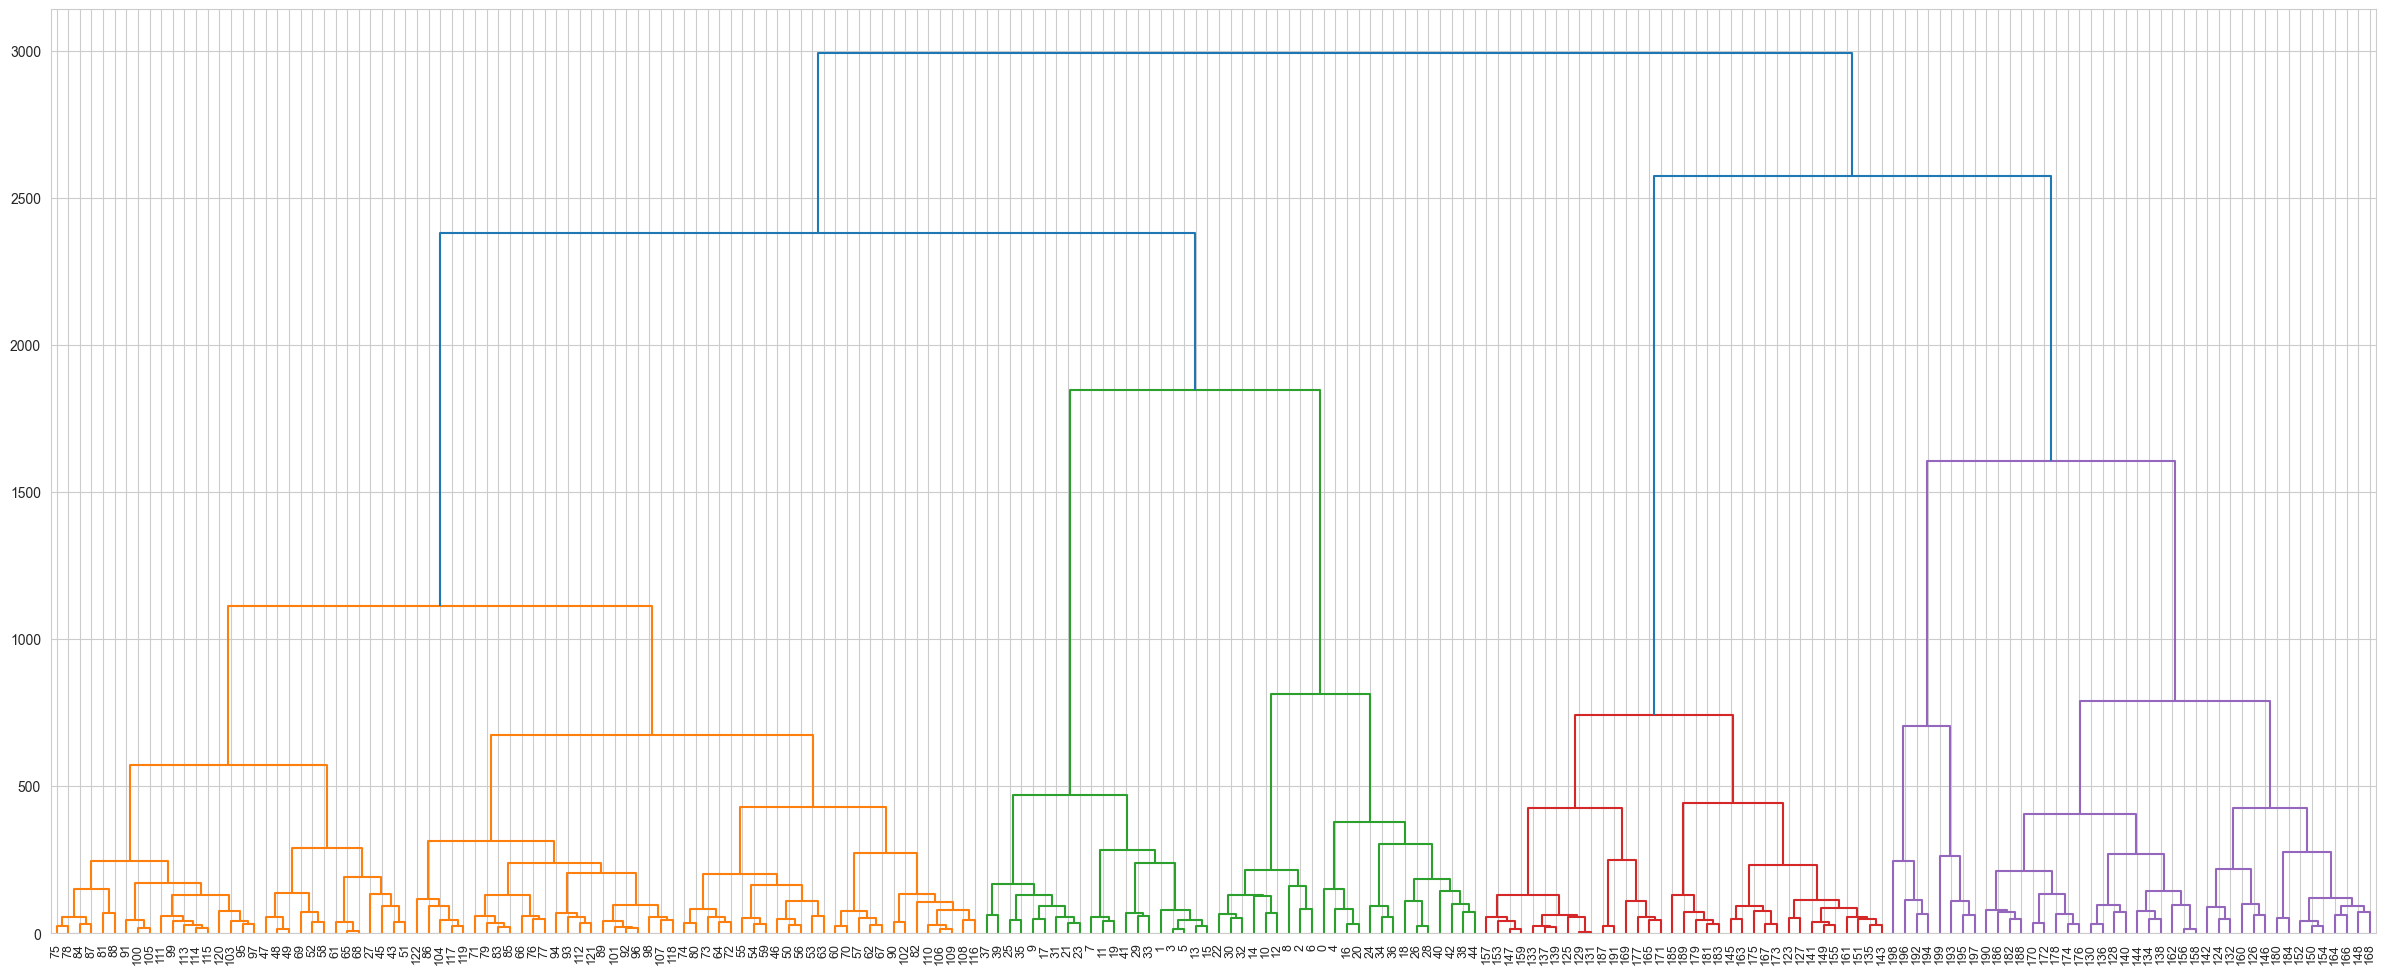

In [55]:
Z = hierarchy.linkage(d_matrix, method='ward')

fig = plt.figure(figsize=(30, 12))
dendro = hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=9, orientation='top')

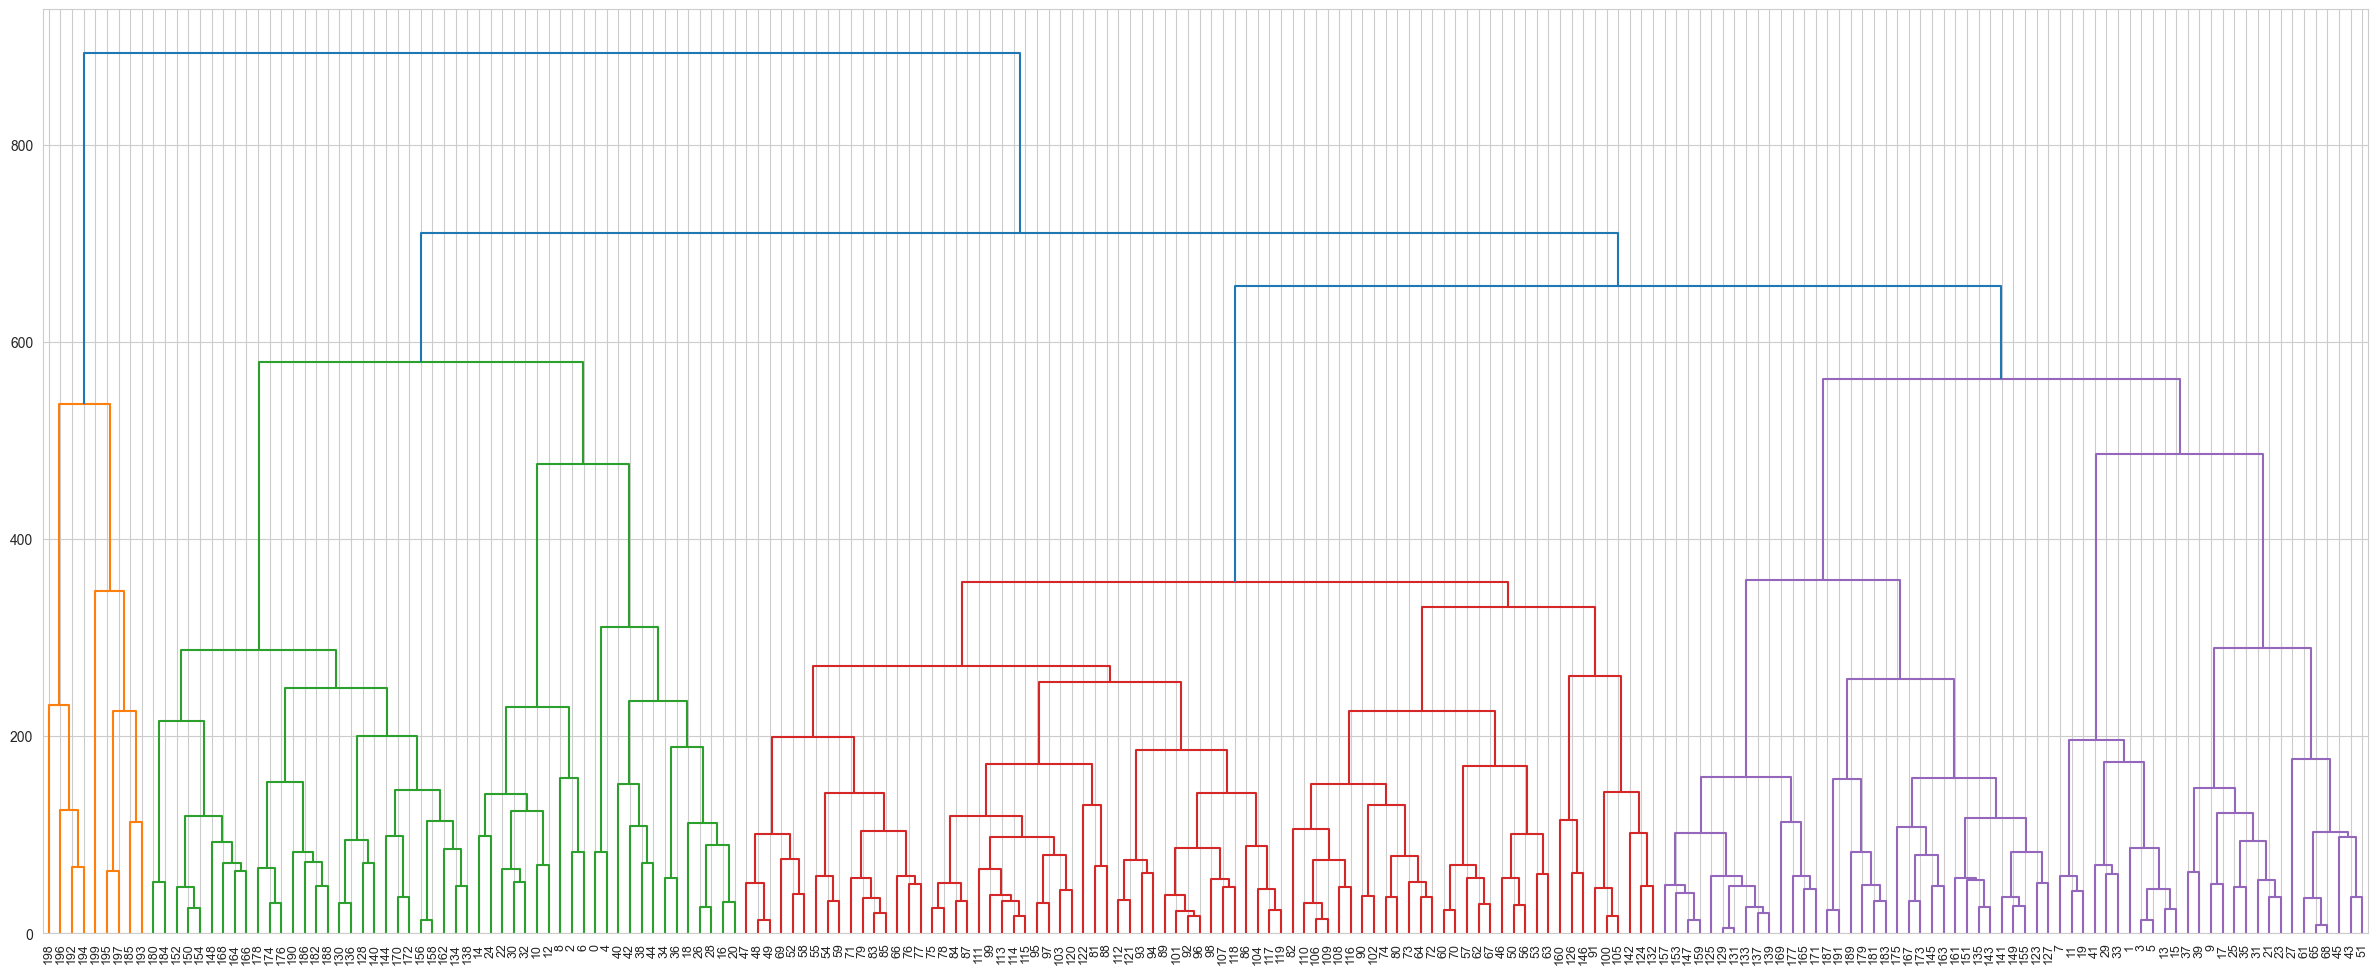

In [54]:
Z = hierarchy.linkage(d_matrix, method='complete')

fig = plt.figure(figsize=(30, 12))
dendro = hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=9, orientation='top')

**Висновки з завдання 12 (детальні)**

1. 
2.   
3. ...

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

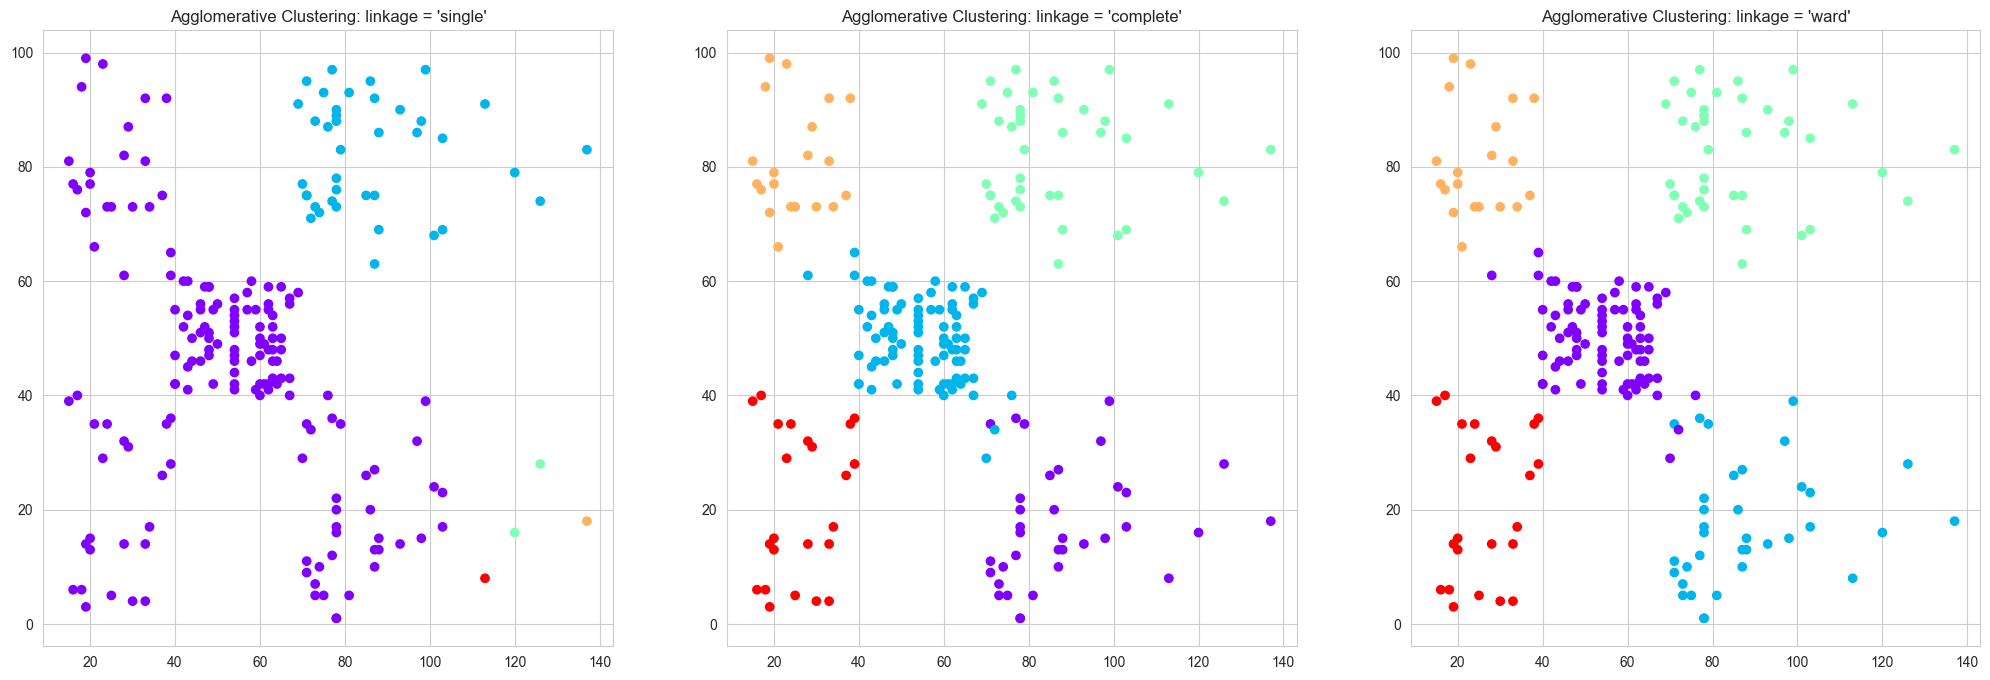

In [77]:
ac5_1 = AgglomerativeClustering(n_clusters = 5, linkage='single')
ac5_2 = AgglomerativeClustering(n_clusters = 5, linkage='complete')
ac5_3 = AgglomerativeClustering(n_clusters = 5, linkage='ward')
 
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(25, 8))

ax1.scatter(X['Income'], X['SpendingScore'], c = ac5_1.fit_predict(X), cmap='rainbow')
ax1.set_title("Agglomerative Clustering: linkage = 'single'")

ax2.scatter(X['Income'], X['SpendingScore'], c = ac5_2.fit_predict(X), cmap='rainbow')
ax2.set_title("Agglomerative Clustering: linkage = 'complete'")

ax3.scatter(X['Income'], X['SpendingScore'], c = ac5_3.fit_predict(X), cmap='rainbow')
ax3.set_title("Agglomerative Clustering: linkage = 'ward'")

plt.show()

**Висновки з завдання 13 (детальні)**

1. 
2.   
3. ...